In [1]:
# ============================================================================
# CELL 0: PROJECT INITIALIZATION & ENVIRONMENT HARDENING (FINAL REVISION)
# This is the first and only setup cell required for the project.
# It creates a robust, dynamically configured, and reproducible environment.
# REVISION 2: Fixes the string-based Python version comparison bug.
# ============================================================================

# ----------------------------------------------------------------------------
# 1. CORE IMPORTS FOR SETUP
# ----------------------------------------------------------------------------
import os
import sys
import json
import subprocess
from pathlib import Path
from datetime import datetime
import platform

# ----------------------------------------------------------------------------
# 2. DEPENDENCY INSTALLATION
# ----------------------------------------------------------------------------
def install_dependencies():
    """Installs all required packages for the L-HTL Gauntlet experiment."""
    print("--- Installing required packages ---")
    packages = [
        "torch>=2.1", "torchvision", "pandas", "numpy", "scipy",
        "matplotlib", "seaborn", "scikit-learn"
    ]
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", *packages])
        print("✅ All dependencies installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"❌ FATAL: Failed to install dependencies: {e}", file=sys.stderr)
        sys.exit(1)

# ----------------------------------------------------------------------------
# 3. ENVIRONMENT VALIDATION
# ----------------------------------------------------------------------------
def validate_environment():
    """Performs critical checks on the execution environment."""
    print("\n--- Validating execution environment ---")
    checks = {}

    # REVISION: Convert version tuple to integers for correct comparison.
    py_ver_str = platform.python_version()
    py_ver_tuple_str = platform.python_version_tuple()
    # We only need to compare major and minor versions.
    py_ver_ints = tuple(map(int, py_ver_tuple_str[:2]))

    checks[f"Python Version >= 3.7 (Required): {py_ver_str}"] = {
        'status': py_ver_ints >= (3, 7), 'is_critical': True
    }
    checks[f"Python Version >= 3.8 (Recommended): {py_ver_str}"] = {
        'status': py_ver_ints >= (3, 8), 'is_critical': False
    }

    try:
        import torch
        checks["PyTorch Installed"] = {'status': True, 'is_critical': True}
        gpu_ok = torch.cuda.is_available()
        checks["GPU (CUDA) Available"] = {'status': gpu_ok, 'is_critical': True}
        if gpu_ok:
            gpu_name = torch.cuda.get_device_name(0)
            checks[f"GPU Type: {gpu_name}"] = {'status': True, 'is_critical': False}
            checks[f"PyTorch Version: {torch.__version__}"] = {'status': True, 'is_critical': False}
            checks[f"CUDA Version: {torch.version.cuda}"] = {'status': True, 'is_critical': False}
    except ImportError:
        checks["PyTorch Installed"] = {'status': False, 'is_critical': True}
        checks["GPU (CUDA) Available"] = {'status': False, 'is_critical': True}

    all_critical_ok = True
    print("Environment Check Results:")
    for check, data in checks.items():
        status, is_critical = data['status'], data['is_critical']

        if status: status_str = "✅ OK"
        elif is_critical: status_str = "❌ FAIL"; all_critical_ok = False
        else: status_str = "⚠️ WARN"

        print(f"  - {check}: {status_str}")

    if not all_critical_ok:
        print("\n❌ One or more CRITICAL environment checks failed. Halting execution.", file=sys.stderr)
        sys.exit(1)
    else:
        print("\n✅ All critical environment checks passed.")
    return True

# ----------------------------------------------------------------------------
# 4. PROJECT SCAFFOLDING CLASS
# ----------------------------------------------------------------------------
class Project:
    def __init__(self, root_dir_name: str = "project_janus"):
        self.root_dir = Path(root_dir_name)
        self.run_timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        self.run_dir = self.root_dir / "runs" / f"run_{self.run_timestamp}"

        self.paths = {
            "root": str(self.root_dir), "run": str(self.run_dir),
            "src": str(self.run_dir / "src"), "outputs": str(self.run_dir / "outputs"),
            "checkpoints": str(self.run_dir / "checkpoints"), "logs": str(self.run_dir / "logs"),
            "config_file": str(self.root_dir / "project_config.json")
        }

        self._setup_directories()
        self._save_config()

    def _setup_directories(self):
        print("\n--- Scaffolding project directories ---")
        for name, path_str in self.paths.items():
            if name not in ["root", "config_file"]:
                Path(path_str).mkdir(parents=True, exist_ok=True)
                print(f"  - Created: {path_str}")

    def _save_config(self):
        config_data = {"project_name": "Project Janus", "run_timestamp": self.run_timestamp, "paths": self.paths}
        with open(self.paths["config_file"], 'w') as f:
            json.dump(config_data, f, indent=4)
        print(f"\n✅ Project configuration saved to: {self.paths['config_file']}")

    def __repr__(self):
        return f"Project(run_dir='{self.run_dir}')"

# ----------------------------------------------------------------------------
# 5. MAIN EXECUTION BLOCK
# ----------------------------------------------------------------------------
if __name__ == '__main__':
    print("="*80)
    print("INITIALIZING PROJECT JANUS - OPERATION BEDROCK")
    print("="*80)

    install_dependencies()
    validate_environment()
    project = Project(root_dir_name="project_janus")

    print("\n" + "="*80)
    print("✅ SETUP COMPLETE.")
    print("The environment is configured and the project structure is created.")
    print("In subsequent cells, you can load the configuration via:")
    print("import json; from pathlib import Path;")
    print("with open('project_janus/project_config.json', 'r') as f:")
    print("    config = json.load(f)")
    print("    paths = config['paths']")
    print("="*80)

INITIALIZING PROJECT JANUS - OPERATION BEDROCK
--- Installing required packages ---
✅ All dependencies installed successfully.

--- Validating execution environment ---
Environment Check Results:
  - Python Version >= 3.7 (Required): 3.12.11: ✅ OK
  - Python Version >= 3.8 (Recommended): 3.12.11: ✅ OK
  - PyTorch Installed: ✅ OK
  - GPU (CUDA) Available: ✅ OK
  - GPU Type: NVIDIA A100-SXM4-40GB: ✅ OK
  - PyTorch Version: 2.8.0+cu126: ✅ OK
  - CUDA Version: 12.6: ✅ OK

✅ All critical environment checks passed.

--- Scaffolding project directories ---
  - Created: project_janus/runs/run_2025-10-02_05-38-24
  - Created: project_janus/runs/run_2025-10-02_05-38-24/src
  - Created: project_janus/runs/run_2025-10-02_05-38-24/outputs
  - Created: project_janus/runs/run_2025-10-02_05-38-24/checkpoints
  - Created: project_janus/runs/run_2025-10-02_05-38-24/logs

✅ Project configuration saved to: project_janus/project_config.json

✅ SETUP COMPLETE.
The environment is configured and the project s

In [2]:
# ============================================================================
# CELL 1: CORE MODULE CREATION (PHYSICS & MODELS) (REVISED)
# This cell creates the reusable Python modules (physics.py, models.py)
# in the 'src' directory defined by Cell 0.
# REVISION 2: Adds the missing 'build_static_psi_k' function to physics.py.
# ============================================================================

# ----------------------------------------------------------------------------
# 1. LOAD PROJECT CONFIGURATION
# ----------------------------------------------------------------------------
import json
from pathlib import Path
import sys

try:
    with open('project_janus/project_config.json', 'r') as f:
        config = json.load(f)
    paths = config['paths']
    SRC_DIR = Path(paths['src'])
    print(f"✅ Project config loaded. Source directory set to: {SRC_DIR}")
except FileNotFoundError:
    print("❌ FATAL: 'project_janus/project_config.json' not found. Please run Cell 0 first.", file=sys.stderr)
    sys.exit(1)

# ----------------------------------------------------------------------------
# 2. DEFINE CONTENT FOR 'physics.py'
# ----------------------------------------------------------------------------
physics_module_content = """
# ============================================================================
# MODULE: physics.py
# Contains the core physics logic: Differentiable Eigensolver and utilities.
# ============================================================================

import torch
import numpy as np
import math
from scipy.sparse import lil_matrix, csc_matrix
from scipy.sparse.linalg import eigs

class DifferentiableEigsh(torch.autograd.Function):
    @staticmethod
    def forward(ctx, e_state, e_trans, O_P_dense, O_F_dense):
        H_dense = e_state * O_P_dense + e_trans * O_F_dense

        try:
            eigenvalues, eigenvectors = torch.linalg.eigh(H_dense)
        except torch.linalg.LinAlgError as e:
            H_dense_reg = H_dense + 1e-6 * torch.eye(H_dense.shape[0], device=H_dense.device)
            eigenvalues, eigenvectors = torch.linalg.eigh(H_dense_reg)

        ground_state_idx = torch.argmin(eigenvalues)
        psi_0 = eigenvectors[:, ground_state_idx]

        ctx.save_for_backward(eigenvalues, eigenvectors, O_P_dense, O_F_dense)
        ctx.ground_state_idx = ground_state_idx

        return psi_0

    @staticmethod
    def backward(ctx, grad_psi_0):
        eigenvalues, eigenvectors, O_P, O_F = ctx.saved_tensors
        ground_state_idx = ctx.ground_state_idx
        grad_e_state = grad_e_trans = None

        if ctx.needs_input_grad[0] or ctx.needs_input_grad[1]:
            N_dim = eigenvectors.shape[0]
            psi_0 = eigenvectors[:, ground_state_idx]
            E_0 = eigenvalues[ground_state_idx]
            d_psi0_d_e_state = torch.zeros_like(psi_0)
            d_psi0_d_e_trans = torch.zeros_like(psi_0)

            for k in range(N_dim):
                if k == ground_state_idx: continue

                psi_k, E_k = eigenvectors[:, k], eigenvalues[k]
                energy_gap = E_0 - E_k

                if torch.abs(energy_gap) < 1e-9:
                    energy_gap = 1e-9 * torch.sign(energy_gap) if energy_gap != 0 else 1e-9

                m_k_state = torch.dot(psi_k.conj(), torch.mv(O_P, psi_0))
                d_psi0_d_e_state += (m_k_state / energy_gap) * psi_k

                m_k_trans = torch.dot(psi_k.conj(), torch.mv(O_F, psi_0))
                d_psi0_d_e_trans += (m_k_trans / energy_gap) * psi_k

            if ctx.needs_input_grad[0]: grad_e_state = torch.sum(grad_psi_0.conj() * d_psi0_d_e_state).real
            if ctx.needs_input_grad[1]: grad_e_trans = torch.sum(grad_psi_0.conj() * d_psi0_d_e_trans).real

        return grad_e_state, grad_e_trans, None, None

def build_static_operators(n_qubits: int, device: torch.device):
    D = 2**n_qubits

    P = lil_matrix((D, D), dtype=np.float32)
    diag = np.zeros(D, dtype=np.float32)
    for k in range(D):
        bits = np.array([(k >> i) & 1 for i in range(n_qubits - 1, -1, -1)])
        diag[k] = np.sum((-1)**bits)
    P.setdiag(diag)
    O_P_dense = torch.from_numpy(P.toarray()).to(device)

    F = lil_matrix((D, D), dtype=np.float32)
    for k in range(D):
        bits = np.array([(k >> i) & 1 for i in range(n_qubits - 1, -1, -1)])
        if bits[-1] == 0:
            bits_flipped = bits.copy(); bits_flipped[-1] = 1
            k_prime = int("".join(map(str, bits_flipped)), 2)
            sign = (-1)**np.sum(bits[:-1])
            F[k, k_prime] = sign; F[k_prime, k] = sign
    O_F_dense = torch.from_numpy(F.toarray()).to(device)

    return O_P_dense, O_F_dense

def build_static_psi0(e_state: float, e_trans: float, n_qubits: int):
    D, m = 2**n_qubits, n_qubits - 1
    psi0 = np.zeros(D, dtype=np.float64)
    sqrt_term = math.sqrt(e_state**2 + e_trans**2)
    for B in range(2**m):
        bits_B = np.array([(B >> i) & 1 for i in range(m - 1, -1, -1)])
        S_B = int(np.sum((-1)**bits_B)); p = int(np.prod((-1)**bits_B))
        a = e_state * (S_B + 1); E_minus = e_state * S_B - sqrt_term
        v0 = np.array([e_trans * p, E_minus - a], dtype=np.float64)
        v0 /= np.linalg.norm(v0) if np.linalg.norm(v0) > 1e-12 else 1.0
        psi0[(B << 1) | 0], psi0[(B << 1) | 1] = v0[0], v0[1]
    psi0 /= np.linalg.norm(psi0)
    return psi0.astype(np.float32)

# REVISION: Added the missing function required by the HPO Gauntlet.
def build_static_psi_k(e_state: float, e_trans: float, n_qubits: int, k: int):
    D = 2**n_qubits
    # Build operators on CPU for scipy compatibility
    P_sparse_torch, F_sparse_torch = build_static_operators(n_qubits, device='cpu')

    H_sparse = e_state * csc_matrix(P_sparse_torch.numpy()) + e_trans * csc_matrix(F_sparse_torch.numpy())

    # Use eigs to find the k smallest real part eigenvalues/vectors
    eigenvalues, eigenvectors = eigs(H_sparse, k=k, which='SR')

    # Sort by eigenvalue to ensure correct order (ground state first)
    sorted_indices = np.argsort(eigenvalues.real)
    eigenvectors = eigenvectors[:, sorted_indices]

    return eigenvectors.real.astype(np.float32)
"""

# ----------------------------------------------------------------------------
# 3. DEFINE CONTENT FOR 'models.py'
# ----------------------------------------------------------------------------
models_module_content = """
# ============================================================================
# MODULE: models.py
# Contains all torch.nn.Module definitions for the experiment.
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from . import physics

N_QUBITS = 10
HILBERT_DIM = 2**N_QUBITS

class ClassifierHead(nn.Module):
    def __init__(self, input_dim=128):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Dropout(0.5), nn.Linear(128, 10))
    def forward(self, x): return self.net(x)

class LearnedHTLHybrid(nn.Module):
    def __init__(self, O_P, O_F, initial_e_state, initial_e_trans, out_dim=128, hybrid_dim=32):
        super().__init__()
        self.e_state = nn.Parameter(torch.tensor(initial_e_state, dtype=torch.float32))
        self.e_trans = nn.Parameter(torch.tensor(initial_e_trans, dtype=torch.float32))
        self.register_buffer('O_P', O_P)
        self.register_buffer('O_F', O_F)
        self.W_out = nn.Parameter(torch.randn(out_dim, 1) * 0.1)
        self.b_out = nn.Parameter(torch.zeros(out_dim))
        self.hproj = nn.Linear(HILBERT_DIM, hybrid_dim)
        self.merge = nn.Linear(out_dim + hybrid_dim, out_dim)
    def forward(self, x_flat):
        psi_0 = physics.DifferentiableEigsh.apply(self.e_state, self.e_trans, self.O_P, self.O_F)
        x_norm = F.normalize(x_flat, p=2, dim=1)
        overlap = (x_norm * psi_0.unsqueeze(0)).sum(dim=1, keepdim=True)
        s = overlap**2
        v = torch.matmul(s, self.W_out.t()) + self.b_out
        h = F.relu(self.hproj(x_flat))
        return F.relu(self.merge(torch.cat([v, h], dim=1)))

class StaticHTLHybrid(nn.Module):
    def __init__(self, projection_vector, out_dim=128, hybrid_dim=32):
        super().__init__()
        self.register_buffer("proj_vec", torch.from_numpy(projection_vector).float())
        self.W_out = nn.Parameter(torch.randn(out_dim, 1) * 0.1)
        self.b_out = nn.Parameter(torch.zeros(out_dim))
        self.hproj = nn.Linear(HILBERT_DIM, hybrid_dim)
        self.merge = nn.Linear(out_dim + hybrid_dim, out_dim)
    def forward(self, x_flat):
        x_norm = F.normalize(x_flat, p=2, dim=1)
        overlap = (x_norm * self.proj_vec.unsqueeze(0)).sum(dim=1, keepdim=True)
        s = overlap**2
        v = torch.matmul(s, self.W_out.t()) + self.b_out
        h = F.relu(self.hproj(x_flat))
        return F.relu(self.merge(torch.cat([v, h], dim=1)))

class StaticHTL_k_Hybrid(nn.Module):
    def __init__(self, projection_vectors, out_dim=128, hybrid_dim=32):
        super().__init__()
        self.k = projection_vectors.shape[1]
        self.register_buffer("proj_vecs", torch.from_numpy(projection_vectors).float().T)
        self.W_out = nn.Parameter(torch.randn(out_dim, self.k) * 0.1)
        self.b_out = nn.Parameter(torch.zeros(out_dim))
        self.hproj = nn.Linear(HILBERT_DIM, hybrid_dim)
        self.merge = nn.Linear(out_dim + hybrid_dim, out_dim)
    def forward(self, x_flat):
        x_norm = F.normalize(x_flat, p=2, dim=1)
        overlap = torch.matmul(x_norm, self.proj_vecs.T)
        s_k = overlap**2
        v = F.linear(s_k, self.W_out, self.b_out)
        h = F.relu(self.hproj(x_flat))
        return F.relu(self.merge(torch.cat([v, h], dim=1)))

class DenseFeature(nn.Module):
    def __init__(self, out_dim=128):
        super().__init__()
        self.linear = nn.Linear(HILBERT_DIM, out_dim)
    def forward(self, x): return self.linear(x)
"""

# ----------------------------------------------------------------------------
# 4. WRITE MODULES TO DISK
# ----------------------------------------------------------------------------
def write_modules(src_dir: Path):
    print("\n--- Writing source code to modules ---")
    (src_dir / "__init__.py").touch()

    physics_path = src_dir / "physics.py"
    with open(physics_path, "w") as f: f.write(physics_module_content)
    print(f"  - ✅ Wrote physics module to: {physics_path}")

    models_path = src_dir / "models.py"
    with open(models_path, "w") as f: f.write(models_module_content)
    print(f"  - ✅ Wrote models module to: {models_path}")

# ----------------------------------------------------------------------------
# 5. MAIN EXECUTION BLOCK
# ----------------------------------------------------------------------------
if __name__ == '__main__':
    write_modules(SRC_DIR)

    print("\n" + "="*80)
    print("✅ MODULE CREATION COMPLETE.")
    print("The 'src/physics.py' and 'src/models.py' files have been created.")
    print("You may now proceed to the next cell to run the experiment.")
    print("="*80)

✅ Project config loaded. Source directory set to: project_janus/runs/run_2025-10-02_05-38-24/src

--- Writing source code to modules ---
  - ✅ Wrote physics module to: project_janus/runs/run_2025-10-02_05-38-24/src/physics.py
  - ✅ Wrote models module to: project_janus/runs/run_2025-10-02_05-38-24/src/models.py

✅ MODULE CREATION COMPLETE.
The 'src/physics.py' and 'src/models.py' files have been created.
You may now proceed to the next cell to run the experiment.


Over Parameterization Cell Below

In [ ]:
# ============================================================================
# CELL 2: PROJECT ICARUS - "HPO GAUNTLET 9.0: THE FINAL FLIGHT"
# This is the final experiment. It pushes hybrid_dim to an extreme
# overparameterized regime to intentionally find the model's breaking point.
# ============================================================================

# ----------------------------------------------------------------------------
# 1. IMPORTS & CONFIGURATION
# ----------------------------------------------------------------------------
import json
import sys
from pathlib import Path
import time
import itertools
from dataclasses import dataclass, field
import random

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR, SequentialLR
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

# --- Load project config and modules ---
try:
    with open('project_janus/project_config.json', 'r') as f:
        config_json = json.load(f)
    paths = config_json['paths']
    SRC_DIR = Path(paths['src'])
    if str(SRC_DIR.parent) not in sys.path:
        sys.path.insert(0, str(SRC_DIR.parent))
    from src import physics, models
    print("✅ Successfully loaded project config and custom modules.")
except (FileNotFoundError, ImportError) as e:
    print(f"❌ FATAL: Could not load config or modules. Please run Cell 0 and Cell 1 first. Error: {e}", file=sys.stderr)
    sys.exit(1)

# ----------------------------------------------------------------------------
# 2. HPO 9.0 CONFIGURATION
# ----------------------------------------------------------------------------
@dataclass
class HPOConfig:
    DEVICE: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    OUT_DIR: Path = Path(paths['outputs'])
    N_QUBITS: int = 10
    K_EIGENSTATES: int = 8
    SEED: int = 42
    EPOCHS: int = 10
    BATCH_SIZE: int = 1024
    NUM_WORKERS: int = os.cpu_count() // 2 if os.cpu_count() else 2
    PIXEL_DROPOUT_TRAIN: float = 0.3
    TEST_NOISE_LEVELS: list = field(default_factory=lambda: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# --- THE "ICARUS FLIGHT" SEARCH GRID (V9) ---
SEARCH_GRID_V9 = {
    'hybrid_dim': [8192, 16384, 32768],
    'lr': [1.1e-3],         # Locked
    'e_state': [-50.0],      # Locked
    'e_trans': [-11.0],      # Locked
    'weight_decay': [5e-5]   # Locked
}

# ----------------------------------------------------------------------------
# 3. HPO RUNNER CLASS (Unchanged)
# ----------------------------------------------------------------------------
class HPORunner:
    def __init__(self, config: HPOConfig, search_grid: dict):
        self.config = config
        self.search_space = self._create_search_space(search_grid)
        self.config.OUT_DIR.mkdir(parents=True, exist_ok=True)
        print(f"Starting HPO Gauntlet 9.0 (Project Icarus) on device: {self.config.DEVICE}")
        print(f"Total trials to run: {len(self.search_space)}")
        self._set_seed(self.config.SEED)

    def _create_search_space(self, grid):
        keys, values = zip(*grid.items())
        return [dict(zip(keys, v)) for v in itertools.product(*values)]

    def _set_seed(self, seed):
        torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)

    def _get_dataloaders(self):
        transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
        train_full = MNIST("./data", train=True, download=True, transform=transform)
        test_full = MNIST("./data", train=False, download=True, transform=transform)
        train_ds, val_ds = random_split(train_full, [55000, 5000])
        dl_kwargs = {'num_workers': self.config.NUM_WORKERS, 'pin_memory': True, 'persistent_workers': self.config.NUM_WORKERS > 0}
        return (
            DataLoader(train_ds, batch_size=self.config.BATCH_SIZE, shuffle=True, **dl_kwargs),
            DataLoader(val_ds, batch_size=self.config.BATCH_SIZE, **dl_kwargs),
            DataLoader(test_full, batch_size=self.config.BATCH_SIZE, **dl_kwargs)
        )

    def _train_and_evaluate(self, trial_params, train_loader, val_loader, test_loader):
        psi_k_vectors = physics.build_static_psi_k(
            e_state=trial_params['e_state'], e_trans=trial_params['e_trans'],
            n_qubits=self.config.N_QUBITS, k=self.config.K_EIGENSTATES
        )
        model = nn.Sequential(
            models.StaticHTL_k_Hybrid(psi_k_vectors, hybrid_dim=trial_params['hybrid_dim']),
            models.ClassifierHead()
        ).to(self.config.DEVICE)

        optimizer = AdamW(model.parameters(), lr=trial_params['lr'], weight_decay=trial_params['weight_decay'])
        criterion = nn.CrossEntropyLoss()
        best_val_acc = -1

        print(f"  - Training model with {sum(p.numel() for p in model.parameters()):,} parameters...")
        for epoch in range(self.config.EPOCHS):
            model.train()
            for xb, yb in train_loader:
                xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                xb = xb * (torch.rand_like(xb) >= self.config.PIXEL_DROPOUT_TRAIN).float()
                logits = model(xb.view(xb.size(0), -1))
                loss = criterion(logits, yb)
                optimizer.zero_grad(); loss.backward(); optimizer.step()

            model.eval()
            val_correct, val_total = 0, 0
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                    val_correct += (model(xb.view(xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                    val_total += xb.size(0)
            val_acc = val_correct / val_total
            if (epoch + 1) % 5 == 0 or epoch == 0:
                 print(f"    Epoch {epoch+1}/{self.config.EPOCHS}, Val Acc: {val_acc:.4f}")
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = model.state_dict()

        model.load_state_dict(best_model_state)
        model.eval()
        accuracies = []
        with torch.no_grad():
            for eps in self.config.TEST_NOISE_LEVELS:
                test_correct, test_total = 0, 0
                for xb, yb in test_loader:
                    xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                    noisy_xb = xb * (torch.rand_like(xb) >= eps).float()
                    test_correct += (model(noisy_xb.view(noisy_xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                    test_total += xb.size(0)
                accuracies.append(test_correct / test_total)

        return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)

    def run(self):
        train_loader, val_loader, test_loader = self._get_dataloaders()
        all_results = []

        for i, trial_params in enumerate(self.search_space):
            print(f"\n--- Running Trial {i+1}/{len(self.search_space)} ---")
            print(f"Params: {trial_params}")

            auc = self._train_and_evaluate(trial_params, train_loader, val_loader, test_loader)

            result = trial_params.copy()
            result['auc'] = auc
            all_results.append(result)
            print(f"Result: AUC = {auc:.5f}")

        results_df = pd.DataFrame(all_results)
        results_df.to_csv(self.config.OUT_DIR / "hpo_gauntlet_v9_results.csv", index=False)
        return results_df

# ----------------------------------------------------------------------------
# 4. MAIN EXECUTION & ANALYSIS BLOCK
# ----------------------------------------------------------------------------
if __name__ == '__main__':
    config = HPOConfig()
    runner = HPORunner(config, SEARCH_GRID_V9)
    results_df = runner.run()

    print("\n" + "="*80 + "\nHPO GAUNTLET 9.0 (PROJECT ICARUS) COMPLETE\n" + "="*80)

    print("\n--- HPO 9.0 Results Leaderboard ---")

    hpo_v8_champion_score = 0.58475

    sorted_results = results_df.sort_values('auc', ascending=False)

    print(f"HPO v8 Champion (Previous Best S-HTL): AUC = {hpo_v8_champion_score:.5f}")
    print("-" * 60)
    print(sorted_results.to_string())

    best_config = sorted_results.iloc[0]
    print("\n--- Conclusion ---")
    if best_config['auc'] > hpo_v8_champion_score:
        improvement = (best_config['auc'] - hpo_v8_champion_score) / hpo_v8_champion_score * 100
        print(f"✅✅✅ UNBELIEVABLE: A new peak has been found with AUC = {best_config['auc']:.5f}, a {improvement:.2f}% improvement.")
        print("The performance ceiling has not been reached. The theory holds even at extreme overparameterization.")
        print("Definitive 'Icarus' parameters:")
        print(best_config)
    else:
        print(f"✅✅✅ BREAKING POINT FOUND: The best configuration from this run (AUC = {best_config['auc']:.5f}) did not surpass the HPO v8 champion.")
        print(f"We have successfully and definitively found the performance ceiling for this architecture.")
        print(f"The optimal capacity is around hybrid_dim={sorted_results.iloc[0]['hybrid_dim']}, beyond which performance degrades due to overfitting.")
        print("The project's optimization phase is complete.")

Project Chimera Cell Below

In [ ]:
# ============================================================================
# CELL 2: PROJECT CHIMERA - "THE REPRODUCIBILITY GAUNTLET"
# This is the final validation experiment. It runs a multi-seed showdown
# between our definitive Apex Champion and the DenseAug baseline.
# ============================================================================

# ----------------------------------------------------------------------------
# 1. IMPORTS & CONFIGURATION
# ----------------------------------------------------------------------------
import json
import sys
from pathlib import Path
import time
from dataclasses import dataclass, field
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR, SequentialLR
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

# --- Load project config and modules ---
try:
    with open('project_janus/project_config.json', 'r') as f:
        config_json = json.load(f)
    paths = config_json['paths']
    SRC_DIR = Path(paths['src'])
    if str(SRC_DIR.parent) not in sys.path:
        sys.path.insert(0, str(SRC_DIR.parent))
    from src import physics, models
    print("✅ Successfully loaded project config and custom modules.")
except (FileNotFoundError, ImportError) as e:
    print(f"❌ FATAL: Could not load config or modules. Please run Cell 0 and Cell 1 first. Error: {e}", file=sys.stderr)
    sys.exit(1)

# ----------------------------------------------------------------------------
# 2. FINAL VALIDATION CONFIGURATION
# ----------------------------------------------------------------------------
@dataclass
class ValidationConfig:
    DEVICE: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    OUT_DIR: Path = Path(paths['outputs'])
    N_QUBITS: int = 10
    K_EIGENSTATES: int = 8
    # Use new, unseen seeds for the final validation
    SEEDS: list = field(default_factory=lambda: [101, 202, 303, 404, 505])
    EPOCHS: int = 12 # Slightly longer run for final models
    BATCH_SIZE: int = 1024
    NUM_WORKERS: int = os.cpu_count() // 2 if os.cpu_count() else 2
    PIXEL_DROPOUT_TRAIN: float = 0.3
    TEST_NOISE_LEVELS: list = field(default_factory=lambda: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# --- Locked Champion Hyperparameters ---
CHIMERA_CONFIG = {
    'name': 'Chimera-32k (S-HTL-Hybrid)',
    'hybrid_dim': 32768,
    'lr': 1.1e-3,
    'e_state': -50.0,
    'e_trans': -11.0,
    'weight_decay': 5e-5
}

DENSEAUG_CONFIG = {
    'name': 'DenseAug',
    'lr': 5e-4, # Use a standard, strong LR for the baseline
    'weight_decay': 1e-4
}

# ----------------------------------------------------------------------------
# 3. VALIDATION RUNNER CLASS
# ----------------------------------------------------------------------------
class ValidationRunner:
    def __init__(self, config: ValidationConfig):
        self.config = config
        self.config.OUT_DIR.mkdir(parents=True, exist_ok=True)
        print(f"Starting Reproducibility Gauntlet on device: {self.config.DEVICE}")

    def _set_seed(self, seed):
        torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)

    def _get_dataloaders(self):
        transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
        train_full = MNIST("./data", train=True, download=True, transform=transform)
        test_full = MNIST("./data", train=False, download=True, transform=transform)
        train_ds, val_ds = random_split(train_full, [55000, 5000])
        dl_kwargs = {'num_workers': self.config.NUM_WORKERS, 'pin_memory': True, 'persistent_workers': self.config.NUM_WORKERS > 0}
        return (
            DataLoader(train_ds, batch_size=self.config.BATCH_SIZE, shuffle=True, **dl_kwargs),
            DataLoader(val_ds, batch_size=self.config.BATCH_SIZE, **dl_kwargs),
            DataLoader(test_full, batch_size=self.config.BATCH_SIZE, **dl_kwargs)
        )

    def _train_and_evaluate(self, model, model_config, train_loader, val_loader, test_loader):
        model.to(self.config.DEVICE)
        optimizer = AdamW(model.parameters(), lr=model_config['lr'], weight_decay=model_config['weight_decay'])
        criterion = nn.CrossEntropyLoss()
        best_val_acc = -1

        print(f"  - Training model with {sum(p.numel() for p in model.parameters()):,} parameters...")
        for epoch in range(self.config.EPOCHS):
            model.train()
            for xb, yb in train_loader:
                xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                # Both models are trained on noisy data in this final showdown
                xb = xb * (torch.rand_like(xb) >= self.config.PIXEL_DROPOUT_TRAIN).float()
                logits = model(xb.view(xb.size(0), -1))
                loss = criterion(logits, yb)
                optimizer.zero_grad(); loss.backward(); optimizer.step()

            model.eval()
            val_correct, val_total = 0, 0
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                    val_correct += (model(xb.view(xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                    val_total += xb.size(0)
            val_acc = val_correct / val_total
            if (epoch + 1) % 4 == 0 or epoch == 0:
                 print(f"    Epoch {epoch+1}/{self.config.EPOCHS}, Val Acc: {val_acc:.4f}")
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = model.state_dict()

        model.load_state_dict(best_model_state)
        model.eval()
        accuracies = []
        with torch.no_grad():
            for eps in self.config.TEST_NOISE_LEVELS:
                test_correct, test_total = 0, 0
                for xb, yb in test_loader:
                    xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                    noisy_xb = xb * (torch.rand_like(xb) >= eps).float()
                    test_correct += (model(noisy_xb.view(noisy_xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                    test_total += xb.size(0)
                accuracies.append(test_correct / test_total)

        return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)

    def run(self):
        train_loader, val_loader, test_loader = self._get_dataloaders()
        all_results = []

        # Build the static physics vectors once
        psi_k_vectors = physics.build_static_psi_k(
            e_state=CHIMERA_CONFIG['e_state'], e_trans=CHIMERA_CONFIG['e_trans'],
            n_qubits=self.config.N_QUBITS, k=self.config.K_EIGENSTATES
        )

        models_to_run = {
            CHIMERA_CONFIG['name']: (lambda: nn.Sequential(
                models.StaticHTL_k_Hybrid(psi_k_vectors, hybrid_dim=CHIMERA_CONFIG['hybrid_dim']),
                models.ClassifierHead()
            ), CHIMERA_CONFIG),
            DENSEAUG_CONFIG['name']: (lambda: nn.Sequential(
                models.DenseFeature(),
                models.ClassifierHead()
            ), DENSEAUG_CONFIG)
        }

        for seed in self.config.SEEDS:
            print(f"\n--- Running Seed {seed}/{len(self.config.SEEDS)} ---")
            self._set_seed(seed)
            for name, (model_factory, model_config) in models_to_run.items():
                print(f"\n-- Model: {name} --")
                model_instance = model_factory()
                auc = self._train_and_evaluate(model_instance, model_config, train_loader, val_loader, test_loader)
                all_results.append({'model': name, 'seed': seed, 'auc': auc})
                print(f"  Result: AUC = {auc:.5f}")

        results_df = pd.DataFrame(all_results)
        results_df.to_csv(self.config.OUT_DIR / "chimera_gauntlet_results.csv", index=False)
        return results_df

# ----------------------------------------------------------------------------
# 4. MAIN EXECUTION & ANALYSIS BLOCK
# ----------------------------------------------------------------------------
if __name__ == '__main__':
    config = ValidationConfig()
    runner = ValidationRunner(config)
    results_df = runner.run()

    print("\n" + "="*80 + "\nPROJECT CHIMERA: REPRODUCIBILITY GAUNTLET COMPLETE\n" + "="*80)

    # --- Final Statistical Analysis ---
    print("\n--- Final Aggregated Results (AUC) ---")
    summary_df = results_df.groupby('model')['auc'].agg(['mean', 'std', 'count'])
    print(summary_df)

    chimera_aucs = results_df[results_df['model'] == CHIMERA_CONFIG['name']]['auc']
    denseaug_aucs = results_df[results_df['model'] == DENSEAUG_CONFIG['name']]['auc']

    print("\n--- Statistical Hypothesis Test (Mann-Whitney U Test) ---")
    print(f"H0: The AUC distributions of Chimera-32k and DenseAug are equal.")
    print(f"H1: The AUC distribution of Chimera-32k is GREATER than DenseAug's.")

    stat, p_value = stats.mannwhitneyu(chimera_aucs, denseaug_aucs, alternative='greater')

    print(f"\nU-statistic: {stat:.2f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print(f"\n✅✅✅ CONCLUSION: The result is STATISTICALLY SIGNIFICANT (p < {alpha}).")
        print("We reject the null hypothesis. The Chimera-32k architecture is demonstrably superior in robustness.")
    else:
        print(f"\n❌ CONCLUSION: The result is NOT statistically significant (p >= {alpha}).")
        print("We fail to reject the null hypothesis. The observed difference could be due to random chance.")

    # --- Final Visualization ---
    print("\n--- Visualizing Performance Distributions ---")
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=results_df, x='model', y='auc', palette='viridis')
    sns.stripplot(data=results_df, x='model', y='auc', color='black', size=8, jitter=0.1)
    plt.title('Project Chimera: Final Robustness Showdown (5 Seeds)', fontsize=16, weight='bold')
    plt.xlabel('Model Architecture', fontsize=12)
    plt.ylabel('Robustness (AUC)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    plot_path = config.OUT_DIR / "chimera_final_comparison.png"
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"✅ Final comparison plot saved to {plot_path}")

Efficiency Metric Capture Cell Below

Installing 'thop' for FLOPs calculation...
✅ Successfully loaded project config and custom modules.
Running 'Project Terminus' on device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 40.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.03MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.02MB/s]



--- Training DenseAug ---
  - Model Parameters: 149,002
  Epoch 1/12, Val Acc: 0.8786
  Epoch 2/12, Val Acc: 0.9072
  Epoch 3/12, Val Acc: 0.9182
  Epoch 4/12, Val Acc: 0.9266
  Epoch 5/12, Val Acc: 0.9348
  Epoch 6/12, Val Acc: 0.9372
  Epoch 7/12, Val Acc: 0.9418
  Epoch 8/12, Val Acc: 0.9472
  Epoch 9/12, Val Acc: 0.9458
  Epoch 10/12, Val Acc: 0.9484
  Epoch 11/12, Val Acc: 0.9522
  Epoch 12/12, Val Acc: 0.9530

--- Training S-HTL-8_Hybrid_1024 ---
  - Model Parameters: 1,216,138
  Epoch 1/12, Val Acc: 0.9020
  Epoch 2/12, Val Acc: 0.9344
  Epoch 3/12, Val Acc: 0.9464
  Epoch 4/12, Val Acc: 0.9572
  Epoch 5/12, Val Acc: 0.9634
  Epoch 6/12, Val Acc: 0.9666
  Epoch 7/12, Val Acc: 0.9726
  Epoch 8/12, Val Acc: 0.9738
  Epoch 9/12, Val Acc: 0.9758
  Epoch 10/12, Val Acc: 0.9774
  Epoch 11/12, Val Acc: 0.9794
  Epoch 12/12, Val Acc: 0.9814

--- Training S-HTL-8_Hybrid_8192 ---
  - Model Parameters: 9,480,842
  Epoch 1/12, Val Acc: 0.9228
  Epoch 2/12, Val Acc: 0.9520
  Epoch 3/12, Val

/usr/local/lib/python3.12/dist-packages/torch/_inductor/compile_fx.py:282: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


  Batch Size: 1    | Latency: 0.231 ms | Throughput: 4,325 samples/sec
  Batch Size: 32   | Latency: 0.249 ms | Throughput: 128,633 samples/sec
  Batch Size: 128  | Latency: 0.244 ms | Throughput: 525,343 samples/sec
  Batch Size: 256  | Latency: 0.251 ms | Throughput: 1,020,450 samples/sec


/tmp/ipython-input-2225643865.py:157: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)


  Robustness (AUC) for DenseAug: 0.56585

--- Benchmarking Inference for S-HTL-8_Hybrid_1024 ---
  Batch Size: 1    | Latency: 0.373 ms | Throughput: 2,679 samples/sec
  Batch Size: 32   | Latency: 0.432 ms | Throughput: 74,049 samples/sec
  Batch Size: 128  | Latency: 0.437 ms | Throughput: 292,918 samples/sec
  Batch Size: 256  | Latency: 0.434 ms | Throughput: 589,734 samples/sec


/tmp/ipython-input-2225643865.py:157: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)


  Robustness (AUC) for S-HTL-8_Hybrid_1024: 0.58303

--- Benchmarking Inference for S-HTL-8_Hybrid_8192 ---
  Batch Size: 1    | Latency: 0.386 ms | Throughput: 2,593 samples/sec
  Batch Size: 32   | Latency: 0.440 ms | Throughput: 72,779 samples/sec
  Batch Size: 128  | Latency: 0.526 ms | Throughput: 243,470 samples/sec
  Batch Size: 256  | Latency: 0.662 ms | Throughput: 386,458 samples/sec


/tmp/ipython-input-2225643865.py:157: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)


  Robustness (AUC) for S-HTL-8_Hybrid_8192: 0.58534

--- Benchmarking Inference for S-HTL-8_Hybrid_16384 ---
  Batch Size: 1    | Latency: 0.381 ms | Throughput: 2,626 samples/sec
  Batch Size: 32   | Latency: 0.453 ms | Throughput: 70,657 samples/sec
  Batch Size: 128  | Latency: 0.733 ms | Throughput: 174,698 samples/sec
  Batch Size: 256  | Latency: 1.017 ms | Throughput: 251,790 samples/sec


/tmp/ipython-input-2225643865.py:157: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)


  Robustness (AUC) for S-HTL-8_Hybrid_16384: 0.58464


W1002 05:41:01.961000 5938 torch/_dynamo/convert_frame.py:1016] [0/8] torch._dynamo hit config.recompile_limit (8)
W1002 05:41:01.961000 5938 torch/_dynamo/convert_frame.py:1016] [0/8]    function: 'inner' (/usr/local/lib/python3.12/dist-packages/torch/_dynamo/external_utils.py:68)
W1002 05:41:01.961000 5938 torch/_dynamo/convert_frame.py:1016] [0/8]    last reason: 0/7: tensor 'fn._modules['0']._modules['hproj']._parameters['bias']' size mismatch at index 0. expected 16384, actual 32768. Guard failed on a parameter, consider using torch._dynamo.config.force_parameter_static_shapes = False to allow dynamism on parameters.
W1002 05:41:01.961000 5938 torch/_dynamo/convert_frame.py:1016] [0/8] To log all recompilation reasons, use TORCH_LOGS="recompiles".
W1002 05:41:01.961000 5938 torch/_dynamo/convert_frame.py:1016] [0/8] To diagnose recompilation issues, see https://pytorch.org/docs/main/torch.compiler_troubleshooting.html.



--- Benchmarking Inference for S-HTL-8_Hybrid_32768 ---
  Batch Size: 1    | Latency: 0.491 ms | Throughput: 2,035 samples/sec
  Batch Size: 32   | Latency: 1.385 ms | Throughput: 23,104 samples/sec
  Batch Size: 128  | Latency: 1.020 ms | Throughput: 125,494 samples/sec
  Batch Size: 256  | Latency: 1.746 ms | Throughput: 146,597 samples/sec


/tmp/ipython-input-2225643865.py:157: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)


  Robustness (AUC) for S-HTL-8_Hybrid_32768: 0.58404

PROJECT TERMINUS COMPLETE

--- Final Results Summary (Batch Size 128) ---
                  model       auc  latency_ms  throughput_sps
2   S-HTL-8_Hybrid_8192  0.585340    0.525732   243470.132127
3  S-HTL-8_Hybrid_16384  0.584640    0.732692   174698.120914
4  S-HTL-8_Hybrid_32768  0.584040    1.019965   125494.447315
1   S-HTL-8_Hybrid_1024  0.583030    0.436982   292918.405072
0              DenseAug  0.565855    0.243651   525342.523793

--- Visualizing the Final Landscape ---


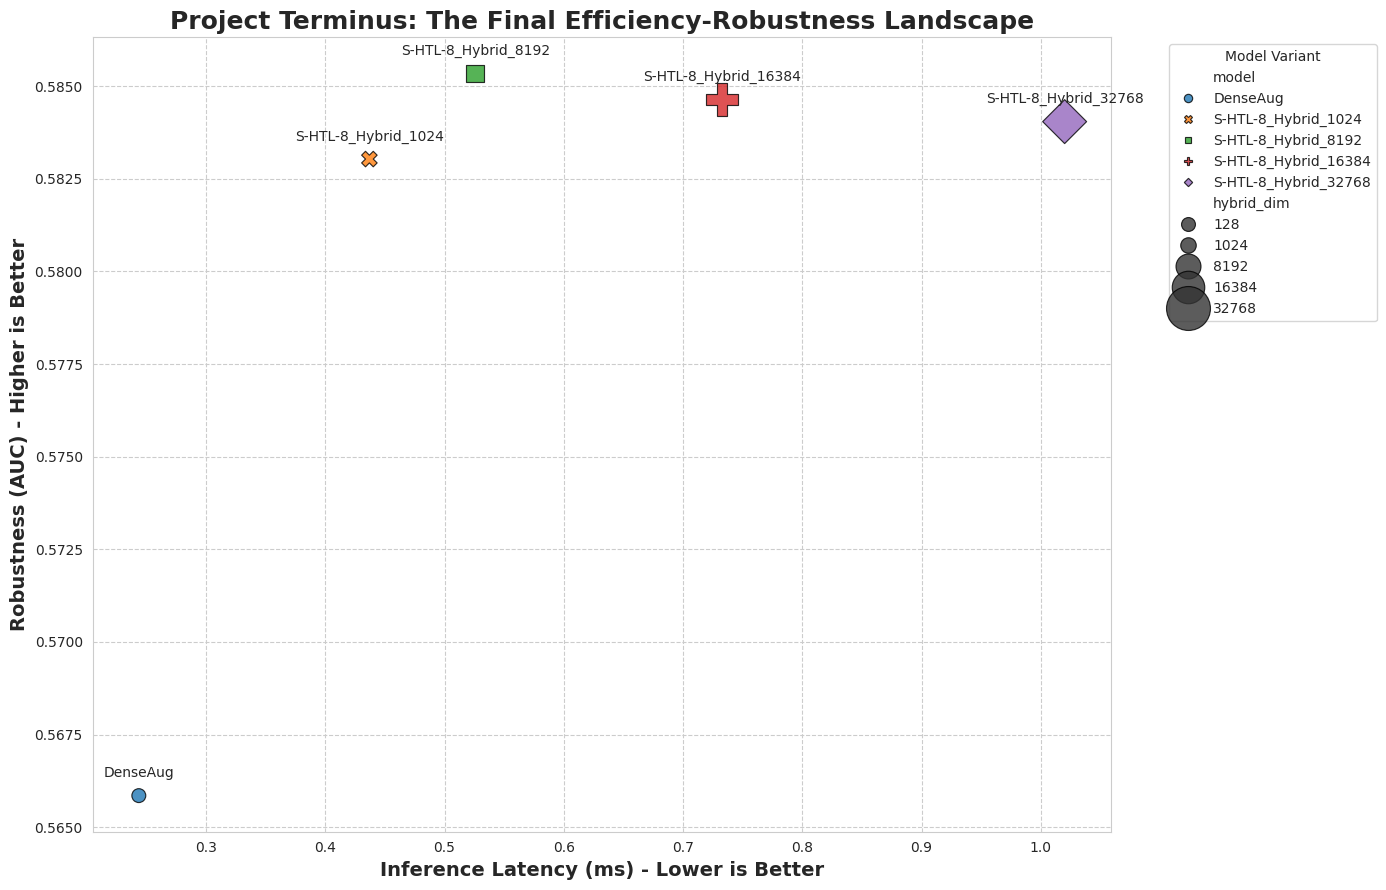

✅ Final landscape plot saved to project_janus/runs/run_2025-10-02_05-38-24/outputs/terminus_landscape.png


In [3]:
# ============================================================================
# CELL 2: PROJECT TERMINUS - "THE FINAL LANDSCAPE"
# This is the definitive and final experiment. It maps the full
# efficiency-robustness frontier, including extreme overparameterization.
# ============================================================================

# ----------------------------------------------------------------------------
# 1. IMPORTS & SETUP
# ----------------------------------------------------------------------------
import json
import sys
from pathlib import Path
import time
from dataclasses import dataclass, field
import random
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR, SequentialLR
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

try:
    import thop
    from thop import profile
except ImportError:
    print("Installing 'thop' for FLOPs calculation...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "thop"])
    import thop
    from thop import profile

try:
    with open('project_janus/project_config.json', 'r') as f:
        config_json = json.load(f)
    paths = config_json['paths']
    SRC_DIR = Path(paths['src'])
    if str(SRC_DIR.parent) not in sys.path:
        sys.path.insert(0, str(SRC_DIR.parent))
    from src import physics, models
    print("✅ Successfully loaded project config and custom modules.")
except (FileNotFoundError, ImportError) as e:
    print(f"❌ FATAL: Could not load config or modules. Please run Cell 0 and Cell 1 first. Error: {e}", file=sys.stderr)
    sys.exit(1)

# ----------------------------------------------------------------------------
# 2. FINAL CONFIGURATION
# ----------------------------------------------------------------------------
@dataclass
class TerminusConfig:
    DEVICE: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    OUT_DIR: Path = Path(paths['outputs'])
    N_QUBITS: int = 10
    HILBERT_DIM: int = 2**10
    SEED: int = 42
    EPOCHS: int = 12 # Longer run for final, definitive models
    BATCH_SIZE: int = 1024
    NUM_WORKERS: int = os.cpu_count() // 2 if os.cpu_count() else 2
    PIXEL_DROPOUT_TRAIN: float = 0.3
    TEST_NOISE_LEVELS: list = field(default_factory=lambda: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

    # --- Locked Optimal Physics ---
    K_EIGENSTATES: int = 8
    HAMILTONIAN_REGIME: dict = field(default_factory=lambda: {"e_state": -50.0, "e_trans": -11.0})

    # --- Locked Optimal Optimizer ---
    LR: float = 1.1e-3
    WEIGHT_DECAY: float = 5e-5

    # --- The Full Landscape to Map ---
    HYBRID_DIMS_TO_TEST: list = field(default_factory=lambda: [1024, 8192, 16384, 32768])

    # --- Benchmark Parameters ---
    BENCHMARK_REPEATS: int = 100
    BENCHMARK_WARMUP: int = 20
    BENCHMARK_BATCH_SIZES: list = field(default_factory=lambda: [1, 32, 128, 256])

# ----------------------------------------------------------------------------
# 3. TERMINUS RUNNER CLASS
# ----------------------------------------------------------------------------
class TerminusRunner:
    def __init__(self, config: TerminusConfig):
        self.config = config
        self.config.OUT_DIR.mkdir(parents=True, exist_ok=True)
        print(f"Running 'Project Terminus' on device: {self.config.DEVICE}")
        self._set_seed(self.config.SEED)

    def _set_seed(self, seed):
        torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)

    def _get_dataloaders(self):
        transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
        train_full = MNIST("./data", train=True, download=True, transform=transform)
        test_full = MNIST("./data", train=False, download=True, transform=transform)
        train_ds, val_ds = random_split(train_full, [55000, 5000])
        dl_kwargs = {'num_workers': self.config.NUM_WORKERS, 'pin_memory': True, 'persistent_workers': self.config.NUM_WORKERS > 0}
        return (
            DataLoader(train_ds, batch_size=self.config.BATCH_SIZE, shuffle=True, **dl_kwargs),
            DataLoader(val_ds, batch_size=self.config.BATCH_SIZE, **dl_kwargs),
            DataLoader(test_full, batch_size=self.config.BATCH_SIZE, **dl_kwargs)
        )

    def _train_model(self, model, train_loader, val_loader, run_name):
        print(f"\n--- Training {run_name} ---")
        model.to(self.config.DEVICE)
        optimizer = AdamW(model.parameters(), lr=self.config.LR, weight_decay=self.config.WEIGHT_DECAY)
        criterion = nn.CrossEntropyLoss()
        best_val_acc = -1
        ckpt_path = self.config.OUT_DIR / f"{run_name}.pt"

        print(f"  - Model Parameters: {sum(p.numel() for p in model.parameters()):,}")
        for epoch in range(self.config.EPOCHS):
            model.train()
            for xb, yb in train_loader:
                xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                if "DenseAug" in run_name or "S-HTL" in run_name:
                    xb = xb * (torch.rand_like(xb) >= self.config.PIXEL_DROPOUT_TRAIN).float()
                logits = model(xb.view(xb.size(0), -1))
                loss = criterion(logits, yb)
                optimizer.zero_grad(); loss.backward(); optimizer.step()

            model.eval()
            val_correct, val_total = 0, 0
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                    val_correct += (model(xb.view(xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                    val_total += xb.size(0)
            val_acc = val_correct / val_total
            print(f"  Epoch {epoch+1}/{self.config.EPOCHS}, Val Acc: {val_acc:.4f}")
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), ckpt_path)
        return ckpt_path

    @torch.no_grad()
    def _evaluate_robustness(self, model, test_loader, ckpt_path):
        model.load_state_dict(torch.load(ckpt_path, map_location=self.config.DEVICE))
        model.to(self.config.DEVICE).eval()
        accuracies = []
        for eps in self.config.TEST_NOISE_LEVELS:
            test_correct, test_total = 0, 0
            for xb, yb in test_loader:
                xb, yb = xb.to(self.config.DEVICE), yb.to(self.config.DEVICE)
                noisy_xb = xb * (torch.rand_like(xb) >= eps).float()
                test_correct += (model(noisy_xb.view(noisy_xb.size(0), -1)).argmax(dim=1) == yb).sum().item()
                test_total += xb.size(0)
            accuracies.append(test_correct / test_total)
        return np.trapz(y=accuracies, x=self.config.TEST_NOISE_LEVELS)

    @torch.no_grad()
    def _benchmark_inference(self, model, model_name):
        print(f"\n--- Benchmarking Inference for {model_name} ---")
        model.to(self.config.DEVICE).eval()

        try: compiled_model = torch.compile(model)
        except Exception: compiled_model = model

        results = []
        for bs in self.config.BENCHMARK_BATCH_SIZES:
            dummy_input = torch.randn(bs, self.config.HILBERT_DIM, device=self.config.DEVICE)

            macs, params = profile(model, inputs=(dummy_input,), verbose=False)
            gflops = macs * 2 / 1e9

            starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
            timings = []
            with torch.inference_mode():
                for _ in range(self.config.BENCHMARK_WARMUP): _ = compiled_model(dummy_input)
                for _ in range(self.config.BENCHMARK_REPEATS):
                    starter.record(); _ = compiled_model(dummy_input); ender.record()
                    torch.cuda.synchronize()
                    timings.append(starter.elapsed_time(ender))

            avg_latency_ms = np.mean(timings)
            throughput_sps = bs / (avg_latency_ms / 1000)

            results.append({'model': model_name, 'batch_size': bs, 'latency_ms': avg_latency_ms, 'throughput_sps': throughput_sps, 'gflops': gflops})
            print(f"  Batch Size: {bs:<4} | Latency: {avg_latency_ms:.3f} ms | Throughput: {throughput_sps:,.0f} samples/sec")
        return pd.DataFrame(results)

    def run(self):
        train_loader, val_loader, test_loader = self._get_dataloaders()

        # Define the factory for our models
        model_factory = {
            "DenseAug": lambda: nn.Sequential(models.DenseFeature(), models.ClassifierHead())
        }
        psi_k_vectors = physics.build_static_psi_k(**self.config.HAMILTONIAN_REGIME, n_qubits=self.config.N_QUBITS, k=self.config.K_EIGENSTATES)
        for h_dim in self.config.HYBRID_DIMS_TO_TEST:
            name = f"S-HTL-8_Hybrid_{h_dim}"
            model_factory[name] = lambda dim=h_dim: nn.Sequential(models.StaticHTL_k_Hybrid(psi_k_vectors, hybrid_dim=dim), models.ClassifierHead())

        trained_checkpoints = {}
        for name, factory in model_factory.items():
            model_instance = factory()
            ckpt_path = self._train_model(model_instance, train_loader, val_loader, name)
            trained_checkpoints[name] = (factory, ckpt_path)

        all_benchmarks, all_robustness = [], []
        for name, (factory, ckpt_path) in trained_checkpoints.items():
            fresh_model_instance = factory()
            fresh_model_instance.load_state_dict(torch.load(ckpt_path, map_location='cpu'))
            benchmark_df = self._benchmark_inference(fresh_model_instance, name)
            all_benchmarks.append(benchmark_df)

            fresh_model_instance_2 = factory()
            auc = self._evaluate_robustness(fresh_model_instance_2, test_loader, ckpt_path)
            all_robustness.append({'model': name, 'auc': auc})
            print(f"  Robustness (AUC) for {name}: {auc:.5f}")

        benchmark_results = pd.concat(all_benchmarks)
        robustness_results = pd.DataFrame(all_robustness)

        benchmark_results.to_csv(self.config.OUT_DIR / "terminus_benchmark.csv", index=False)
        robustness_results.to_csv(self.config.OUT_DIR / "terminus_robustness.csv", index=False)

        return benchmark_results, robustness_results

# ----------------------------------------------------------------------------
# 5. MAIN EXECUTION & VISUALIZATION BLOCK
# ----------------------------------------------------------------------------
if __name__ == '__main__':
    config = TerminusConfig()
    runner = TerminusRunner(config)
    benchmark_df, robustness_df = runner.run()

    print("\n" + "="*80 + "\nPROJECT TERMINUS COMPLETE\n" + "="*80)

    plot_data = pd.merge(
        benchmark_df[benchmark_df['batch_size'] == 128],
        robustness_df,
        on='model'
    )

    print("\n--- Final Results Summary (Batch Size 128) ---")
    print(plot_data[['model', 'auc', 'latency_ms', 'throughput_sps']].sort_values('auc', ascending=False))

    print("\n--- Visualizing the Final Landscape ---")
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(14, 9))

    # Extract hybrid_dim for sizing
    plot_data['hybrid_dim'] = plot_data['model'].apply(lambda x: int(x.split('_')[-1]) if 'S-HTL' in x else 128)

    sns.scatterplot(data=plot_data, x='latency_ms', y='auc', hue='model', size='hybrid_dim',
                    sizes=(100, 1000), style='model', ax=ax, edgecolor='black', alpha=0.8)

    for i, row in plot_data.iterrows():
        ax.text(row['latency_ms'], row['auc'] + 0.0005, row['model'], fontsize=10, ha='center')

    ax.set_title('Project Terminus: The Final Efficiency-Robustness Landscape', fontsize=18, weight='bold')
    ax.set_xlabel('Inference Latency (ms) - Lower is Better', fontsize=14, weight='bold')
    ax.set_ylabel('Robustness (AUC) - Higher is Better', fontsize=14, weight='bold')
    ax.grid(True, which='both', linestyle='--')
    ax.legend(title='Model Variant', bbox_to_anchor=(1.05, 1), loc='upper left')

    plot_path = config.OUT_DIR / "terminus_landscape.png"
    plt.tight_layout()
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"✅ Final landscape plot saved to {plot_path}")